In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# from sklearn.gaussian_process import GaussianProcess

# subroutines

In [95]:
## diversity
def shannon(oneD_array, total=100):
    shannon = 0
    for item in oneD_array:
        if item != 0:
            if total == 100:
                item = item / 100.0
                
            shannon += item * np.log(item)
    shannon *= -1
    shannon = round(shannon, 5)
    return shannon

# test_profile = pd.read_table('C:\Users\pengye\Desktop\\tmp\\annotated.mOTU.abundances.original')
# shannon(test_profile.ix[:, 1])

## get df of a specific taxo level
def taxoLevel(profile, level, data='df'):
    """
    PROFILE should be a DataFrame or a Series (indicates by key word DATA), by default, data == 'df' (DataFrame)
    
    LEVEL indicates which level of taxonomy profile you want to get
    for instance, 
        >>> taxoLevel(df_profile_with_month.ix[:2, :], 'k', 'df')
    gives you,
        >>>
            	k__Archaea	k__Bacteria	k__Eukaryota	k__Viruses
            10_12M	0	100.0000	0	0.0000
            10_20150812	0	99.9958	0	0.0042
    """
    result = pd.DataFrame()
    if data=='df':
        for item in profile.columns:
            short = item.split('|')[-1].split('__')[0]
            if short == level:
                result[item] = pd.to_numeric(profile[item])
        # result = result.to_numeric
        
    else:
        result = pd.Series()
        for item in profile.index:
            short = item.split('|')[-1].split('__')[0]
            if short == level:
                result[item] = profile[item]
        result = pd.to_numeric(result)
    return result

# data

## loading

In [146]:
df_age = pd.DataFrame.from_csv('C:\Users\pengye\Desktop\infantGMG\data\\758sample.age.csv', sep='\t')
df_rxn = pd.DataFrame.from_csv('C:\Users\pengye\Desktop\infantGMG\data\\758.sample.rxn.profile', sep='\t').T
df_motu = pd.DataFrame.from_csv('C:\Users\pengye\Desktop\infantGMG\data\\758.sample.mOTU.profile', sep='\t').T
df_ko = pd.DataFrame.from_csv('C:\Users\pengye\Desktop\infantGMG\data\\758.sample.ko.profile', sep='\t').T
df_go = pd.DataFrame.from_csv('C:\Users\pengye\Desktop\infantGMG\data\\758.sample.go.profile', sep='\t').T
df_ec = pd.DataFrame.from_csv('C:\Users\pengye\Desktop\infantGMG\data\\758.sample.ec.profile', sep='\t').T
df_pwy = pd.DataFrame.from_csv('C:\Users\pengye\Desktop\infantGMG\data\\758.sample.pwy.profile', sep='\t').T
df_bug = pd.DataFrame.from_csv('C:\Users\pengye\Desktop\infantGMG\data\\all.798.bug.profile_newCol.txt', sep='\t').T

# df_gf = pd.DataFrame.from_csv('C:\Users\pengye\Desktop\infantGMG\data\\758.sample.genefamilies.profile', sep='\t')
# this file is too big, and it takes too much memory, so it will be processed especially later.

In [174]:
df_bug_s = taxoLevel(df_bug, 's', data='df')
list_bug_spec_div = [shannon(df_bug_s.ix[i, :]) for i in range(len(df_bug_s.index))]
df_bug['spec_diversity'] = list_bug_spec_div

list_rxn_div = [shannon(df_rxn.ix[i, :], total=1) for i in range(len(df_rxn.index))]
df_rxn['rxn_diversity'] = list_rxn_div

list_motu_div = [shannon(df_motu.ix[i, :], total=1) for i in range(len(df_motu.index))]
df_motu['motu_diversity'] = list_motu_div

list_ko_div = [shannon(df_ko.ix[i, :], total=1) for i in range(len(df_ko.index))]
df_ko['ko_diversity'] = list_ko_div

list_go_div = [shannon(df_go.ix[i, :], total=1) for i in range(len(df_go.index))]
df_go['go_diversity'] = list_go_div

list_ec_div = [shannon(df_ec.ix[i, :], total=1) for i in range(len(df_ec.index))]
df_ec['ec_diversity'] = list_ec_div

list_pwy_div = [shannon(df_pwy.ix[i, :], total=1) for i in range(len(df_pwy.index))]
df_pwy['pwy_diversity'] = list_pwy_div

In [175]:
df_all_but_gf = pd.concat([df_rxn, df_ko, df_go, df_ec, df_pwy, df_motu, df_bug], axis=1, join='inner')
# df_all_but_gf.ix[750, 0] /df_all_but_gf.ix[:, 0].max()

In [895]:
# save file
df_all_but_gf.to_csv('C:\Users\pengye\Desktop\infantGMG\data\\df_all_but_gf.csv', sep='\t')

In [237]:
# 739 smpl, both included in df_age and df_profile
list_age_and_profile = list(set(df_age.index) & set(df_all_but_gf.index))
df_age_739 = df_age.ix[list_age_and_profile]
df_all_but_gf_739 = df_all_but_gf.ix[list_age_and_profile]

In [385]:
# 721 smpl, select from 739 smpl with age less than or equal to 36 months
df_age_721_le36 = df_age_739[df_age_739['month'] <= 36]
df_all_but_gf_721 = df_all_but_gf.ix[df_age_721_le36.index]

## trim 0, 4, 12M

In [ ]:
# 460 smpl, trimmed from 721 smpl with age less than or equal to 36 months

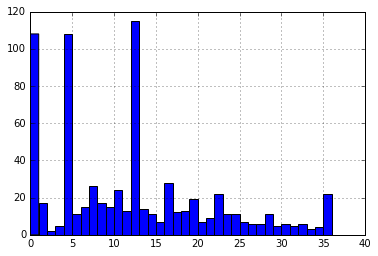

In [741]:
df_age_721_le36['month'].hist(bins=36)

In [761]:
list_0_4_12M_all_smpl = [x for x in df_age_721_le36.index if 'M' in x or 'B' in x]
#df_age_460
np.random.seed(4)
list_0_4_12M_261_smpl = [x for x in np.random.permutation(list_0_4_12M_smpl)[39:]]

In [778]:
df_all_but_gf_460 = df_all_but_gf_721.drop(list_0_4_12M_261_smpl)
df_age_460_le36 = df_age_721_le36.drop(list_0_4_12M_261_smpl)

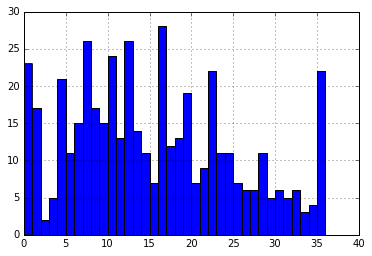

In [773]:
df_age_460_le36['month'].hist(bins=36)

## scaling with MinMaxScaler

In [154]:
from sklearn.preprocessing import MinMaxScaler

In [780]:
ndarray_all_but_gf_scaled_721 = MinMaxScaler().fit_transform(df_all_but_gf_721)
df_all_but_gf_scaled_721 = pd.DataFrame(ndarray_all_but_gf_scaled_721)

df_all_but_gf_scaled_721.columns = df_all_but_gf_721.columns # just don't wanna convert df into ndarray (for later regression part, so...)
df_all_but_gf_scaled_721.index = df_all_but_gf_721.index

ndarray_all_but_gf_scaled_460 = MinMaxScaler().fit_transform(df_all_but_gf_460)
df_all_but_gf_scaled_460 = pd.DataFrame(ndarray_all_but_gf_scaled_460)
df_all_but_gf_scaled_460.columns = df_all_but_gf_460.columns
df_all_but_gf_scaled_460.index = df_all_but_gf_460.index

# feature selection

## by variance

In [236]:
from sklearn.feature_selection import VarianceThreshold 
# not used

In [774]:
all_460_profile_std = df_all_but_gf_460.describe().ix['std']

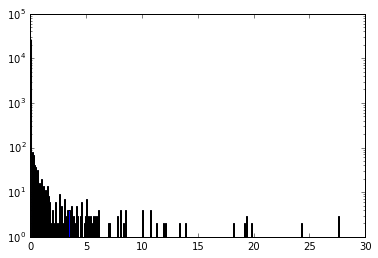

count    2.624300e+04
mean     5.809612e-02
std      7.438379e-01
min      0.000000e+00
25%      1.944394e-08
50%      9.432867e-06
75%      7.584917e-05
max      2.760225e+01
Name: std, dtype: float64

In [775]:
## not scaled
%matplotlib inline
plt.xlim(0,30)
plt.yscale('log')
plt.hist(all_460_profile_std, bins=300)
plt.show()
all_460_profile_std.describe()

In [781]:
all_460_profile_scaled_std = df_all_but_gf_scaled_460.describe().ix['std']

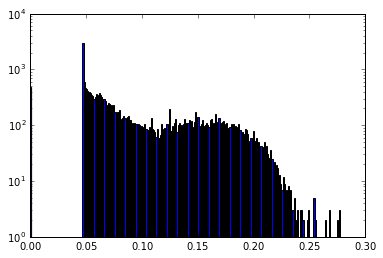

count    26243.000000
mean         0.098853
std          0.052335
min          0.000000
25%          0.054793
50%          0.079298
75%          0.142529
max          0.297135
Name: std, dtype: float64

In [782]:
## scaled
%matplotlib inline
plt.xlim(0,0.3)
plt.yscale('log')
plt.hist(all_460_profile_scaled_std, bins=300)
plt.show()
all_460_profile_scaled_std.describe()

In [783]:
sr_std_460_profile_scaled_ge_75 = all_460_profile_scaled_std[all_460_profile_scaled_std >= all_460_profile_scaled_std.quantile(.75)]

## by correlation coefficient

In [784]:
sr_corr_month_and_profile = df_all_but_gf_scaled_460.corrwith(df_age_460_le36['month'])
sr_corr_day_and_profile = df_all_but_gf_scaled_460.corrwith(df_age_460_le36['days'])

count    25771.000000
mean        -0.075037
std          0.206416
min         -0.624019
25%         -0.168780
50%         -0.035621
75%          0.051102
max          0.598986
dtype: float64

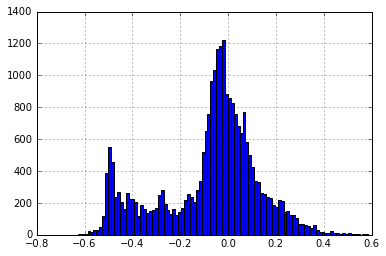

In [785]:
%matplotlib inline
sr_corr_month_and_profile.hist(bins=100)
sr_corr_month_and_profile.describe()

count    25771.000000
mean        -0.073807
std          0.203538
min         -0.616259
25%         -0.166165
50%         -0.034961
75%          0.050503
max          0.590395
dtype: float64

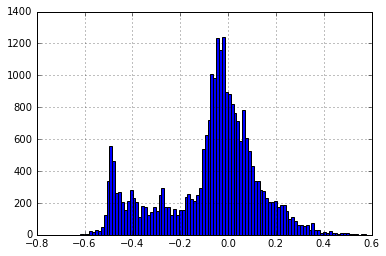

In [786]:
sr_corr_day_and_profile.hist(bins=100)
sr_corr_day_and_profile.describe()

In [787]:
sr_corr_month_abs_ge_03 = sr_corr_month_and_profile[sr_corr_month_and_profile**2>=0.09]
sr_corr_day_abs_ge_03 = sr_corr_day_and_profile[sr_corr_day_and_profile**2>=0.09]

print 'Union:', len(set(sr_corr_month_abs_ge_03.index) | set(sr_corr_day_abs_ge_03.index))
print 'Symmetric Difference:', len(set(sr_corr_month_abs_ge_03.index) ^ set(sr_corr_day_abs_ge_03.index))

Union: 4978
Symmetric Difference: 96


In [788]:
list_abs_ge_03_union_d_m = list(set(sr_corr_month_abs_ge_03.index) | set(sr_corr_day_abs_ge_03.index))

## select according to variance (ge 75%) and corr (abs ge 0.2, union)

In [791]:
set_q75 = set(sr_std_460_profile_scaled_ge_75.index)
set_c03 = set(list_abs_ge_03_union_d_m)
only_q75 = len(set_q75 - set_c03)
only_c03 = len(set_c03 - set_q75)
both_q75_c03 = len(set_c03 & set_q75)

In [353]:
"""
import pip

def install(package):
   pip.main(['install', package])
# install('matplotlib-venn')
"""

In [358]:
from matplotlib_venn import venn2

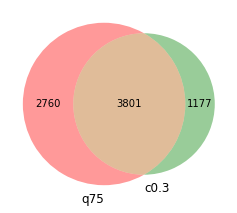

In [792]:
%matplotlib inline
plt.figure(figsize=(4, 4))
venn2(subsets=(only_q75, only_c03, both_q75_c03), set_labels=('q75', 'c0.3'))
plt.show()

In [793]:
list_c03_d_m_AND_q75 = list(set_c03 & set_q75)

In [794]:
df_all_but_gf_scaled_460_c03_d_m_AND_q75 = df_all_but_gf_scaled_460[list_c03_d_m_AND_q75]

## select using RF

In [375]:
from sklearn.ensemble import RandomForestRegressor as rfr

In [795]:
X = df_all_but_gf_scaled_460_c03_d_m_AND_q75

# use 'month'
y = df_age_460_le36['month']

In [796]:
regr_rf = rfr(max_depth=30, random_state=2)
regr_rf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=2,
           verbose=0, warm_start=False)

Feature ranking:
1. feature 3469 (0.508315), 0.508315
2. feature 2522 (0.022306), 0.530621
3. feature 153 (0.014166), 0.544787
4. feature 270 (0.010820), 0.555607
5. feature 2218 (0.010596), 0.566203
6. feature 1189 (0.009832), 0.576035
7. feature 1914 (0.009793), 0.585828
8. feature 3591 (0.009734), 0.595562
9. feature 927 (0.009551), 0.605113
10. feature 647 (0.009293), 0.614406
11. feature 62 (0.007509), 0.621915
12. feature 2593 (0.007461), 0.629376
13. feature 2448 (0.006347), 0.635722
14. feature 512 (0.006341), 0.642064
15. feature 2412 (0.006239), 0.648303
16. feature 981 (0.005875), 0.654179
17. feature 2712 (0.005844), 0.660022
18. feature 460 (0.005599), 0.665621
19. feature 866 (0.005197), 0.670818
20. feature 2528 (0.005159), 0.675977
21. feature 1973 (0.005112), 0.681089
22. feature 910 (0.004993), 0.686082
23. feature 2738 (0.004822), 0.690904
24. feature 1033 (0.004487), 0.695392
25. feature 323 (0.004254), 0.699645
26. feature 1546 (0.004092), 0.703737
27. feature 598 

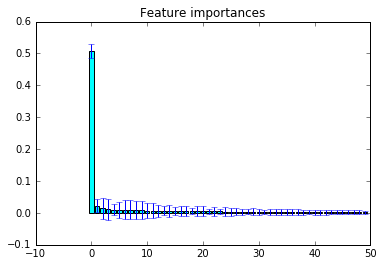

In [797]:
# pd.Series(regr_rf.feature_importances_).plot()

importances = regr_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

list_idx = []
cumsum = 0
for f in range(X.shape[1]):
    cumsum += float(importances[indices[f]])
    list_idx.append(indices[f])
    print("%d. feature %d (%f), %f" % (f + 1, indices[f], importances[indices[f]], cumsum))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")

plt.bar(range(50), importances[indices[:50]],
       color="cyan", yerr=std[indices[:50]], align="center")

# plt.bar(range(X.shape[1]), importances[indices],
#       color="cyan", yerr=std[indices], align="center")
# plt.xticks(range(X.shape[1]), indices)
# plt.xlim([-1, X.shape[1]])
plt.show()

In [482]:
from sklearn.cross_validation import cross_val_score

In [798]:
y = df_age_460_le36['month']
tmp_regr_rf = rfr(max_depth=30, random_state=2)

idx = []
dict_score = {}
dict_score_mean = {}
dict_residual = {}

for i, id_ in enumerate(list_idx):
    idx.append(id_)
    x = df_all_but_gf_scaled_460_c03_d_m_AND_q75.ix[:, idx]
    tmp_regr_rf.fit(x, y)
    y_predict = tmp_regr_rf.predict(x)
    residual = y_predict - y
    residual = residual ** 2
    
    dict_score[i+1] = tmp_regr_rf.score(x, y)
    dict_score_mean[i+1] = cross_val_score(tmp_regr_rf, x, y).mean()
    dict_residual[i+1] = residual.sum()
    
    # print 'Processing feature %d' % i
    
    # according to feature importance info, select the top 124 features (with importance >= 0.001)
    if i == 123:
         break
    

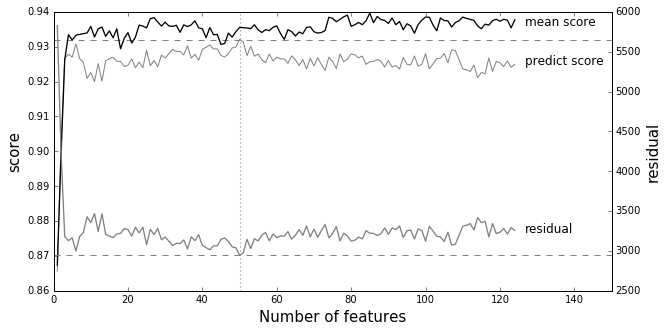

In [835]:
df_score_residual = pd.DataFrame([dict_score, dict_score_mean, dict_residual], index=['score', 'cross_val_score_mean', 'residual'])

plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor='white')
ax = plt.gca()

ax.plot(df_score_residual.ix['score'], c='grey', linestyle='-', linewidth=1)
ax.set_ylabel('score', color='k', fontsize=15)
ax.axhline(df_score_residual.ix['score'].max(), c='gray', linestyle='--')

ax1 = ax.twinx()
ax1.plot(df_score_residual.ix['cross_val_score_mean'], c='k', linewidth=1.3)
ax1.set_yticklabels([])
ax1.set_yticks([])
# ax1.set_ylabel('', color='grey')

ax2 = ax.twinx()
ax2.plot(df_score_residual.ix['residual'], c='gray', linestyle='-', linewidth=1.3)
ax2.set_ylabel('residual', color='k', fontsize=15)
ax2.axhline(df_score_residual.ix['residual'].min(), c='gray', linestyle='--')

ax.axvline(50, c='gray', linestyle=':', linewidth=1.2)
ax.set_xlabel('Number of features', fontsize=15)

plt.xlim(xmax=150)
ax.text(.845, .95, 'mean score', transform=ax.transAxes, color='k', fontsize=12)
ax.text(.845, .81, 'predict score', transform=ax.transAxes, color='k', fontsize=12)
ax.text(.845, .21, 'residual', transform=ax.transAxes, color='k', fontsize=12)


In [894]:
# save file
pd.Series(list_idx).to_csv('C:\Users\pengye\Desktop\infantGMG\data\\feature.importance.list')

In [837]:
list_50_f_loc = list_idx[:50]

df_all_but_gf_scaled_460__c03_d_m_AND_q75__rf_50 = df_all_but_gf_scaled_460_c03_d_m_AND_q75.ix[:, list_50_f_loc]
list_50_f_names = list(df_all_but_gf_scaled_460_c03_d_m_AND_q75.ix[:, list_50_f_loc].columns)

In [838]:
list_50_f_names

['k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae',
 'METH-ACETATE-PWY:methanogenesisfromacetate',
 'K03294',
 'K07177',
 'GLUDEG-I-PWY:GABAshunt',
 'K02074',
 '3.4.21.105',
 '3.4.19.3',
 'K03316',
 'CYTOCHROME-B5-REDUCTASE-RXN',
 'K02035',
 'K03488',
 'K07003',
 'K10778',
 'K06999',
 'K00681',
 'PWY-5101:L-isoleucinebiosynthesisII',
 'GO:0048638:BP:04:regulation of developmental growth',
 'K01338',
 'K04085',
 'PWY-5994:palmitatebiosynthesisI(animalsandfungi)',
 'Faecalibacterium_prausnitzii',
 'K15257',
 'motu_diversity',
 'RXN-14227',
 '1.5.1.39',
 'K15633',
 'K06218',
 'K16793',
 '1.2.1.9',
 'K07230',
 'K02598',
 'K00616',
 'K14067',
 'FUCPALDOL-RXN',
 'PWY-6969:TCAcycleV(2-oxoglutarate:ferredoxinoxidoreductase)',
 'K03835',
 '2.6.1.88',
 'K01238',
 'PWY-5857:ubiquinol-10biosynthesis(prokaryotic)',
 'K00982',
 'K11477',
 'K09998',
 'K07397',
 'K06381',
 'GO:0005328:MF:03:neurotransmitter:sodium symporter activity',
 'ADENYLATECYC-RXN',
 'RXN-13142',
 'K0

# model construction

## 50 features

In [839]:
x_50 = df_all_but_gf_scaled_460__c03_d_m_AND_q75__rf_50
y = df_age_460_le36['month']

regr_rf_50 = rfr(max_depth=30, random_state=2)
regr_rf_50.fit(x_50, y)
y_50 = regr_rf_50.predict(x_50)

corr_y__y_50 = np.corrcoef(list(y), list(y_50))[0, 1]

score_50 = regr_rf_50.score(x_50, y)
cross_val_50_mean = cross_val_score(regr_rf_50, x_50, y).mean()

In [866]:
## subroutine for plotting
def plotScatter(y_true, y_predict, title):
    ax = plt.gca()
    plt.ylim(-5, 40)
    ax.scatter(y_predict, y_true, c='grey', edgecolors='grey', alpha=.6)
    ax.set_xticklabels(['', 0, 5, 10, 15, 20, 25, 30, 35])
    ax.set_yticklabels(['', 0, 5, 10, 15, 20, 25, 30, 35])
    ax.set_xlabel('True month of age', fontsize=12)
    ax.set_ylabel('Predicted month of age', fontsize=13)
    ax.set_title(title, fontsize=15)
    
    corr_ = np.corrcoef(list(y_true), list(y_predict))[0, 1]
    ax.text(0, 35, "Pearson's $R^2$ = %.3f" % corr_**2, fontsize=10)
    
    ax1 = ax.twinx()
    ax1.plot((-.5, 36), (-.5, 36), c='k')
    ax1.set_yticklabels([])
    ax1.set_yticks([])
    plt.show()

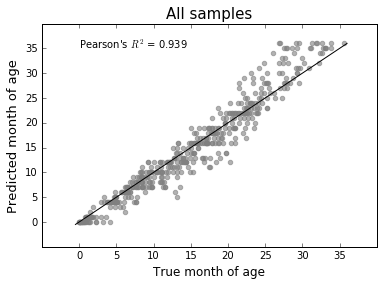

In [841]:
plotScatter(y, y_50, 'All samples')

## standard

In [887]:
def getPredictOfMonth(y_true, y_predict):
    dict_m = {}
    for true, predict in zip(y_true, y_predict):
        if true not in dict_m:
            dict_m[true] = [predict]
        else:
            dict_m[true].append(predict)
    return dict_m
def getStatsOfMonth(dict_m):
    dict_stats = {}
    for m, results in dict_m.items():
        dict_stats[m] = 

In [892]:
dict_50f_m_all = getPredictOfMonth(y, y_50)

## train_test

In [654]:
from sklearn.cross_validation import train_test_split

In [863]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_50, y,
                                                   train_size=322, # test_size = 138
                                                   random_state=1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(x_50, y,
                                                   train_size=322, # test_size = 138
                                                   random_state=2)

X_train3, X_test3, y_train3, y_test3 = train_test_split(x_50, y,
                                                   train_size=322, # test_size = 138
                                                   random_state=3)

X_train4, X_test4, y_train4, y_test4 = train_test_split(x_50, y,
                                                   train_size=322, # test_size = 138
                                                   random_state=4)

X_train5, X_test5, y_train5, y_test5 = train_test_split(x_50, y,
                                                   train_size=322, # test_size = 138
                                                   random_state=5)

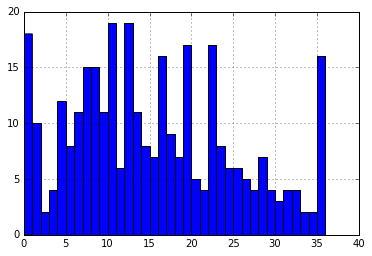

In [844]:
y_train1.hist(bins=36)

In [845]:
regr_rf_subtest_1 = rfr(max_depth=30, random_state=2)
regr_rf_subtest_1.fit(X_train1, y_train1)

y_rf_train1 = regr_rf_subtest_1.predict(X_train1)
y_rf_test1 = regr_rf_subtest_1.predict(X_test1)

In [846]:
regr_rf_subtest_2 = rfr(max_depth=30, random_state=2)
regr_rf_subtest_2.fit(X_train2, y_train2)

y_rf_train2 = regr_rf_subtest_2.predict(X_train2)
y_rf_test2 = regr_rf_subtest_2.predict(X_test2)

In [847]:
regr_rf_subtest_3 = rfr(max_depth=30, random_state=2)
regr_rf_subtest_3.fit(X_train3, y_train3)

y_rf_train3 = regr_rf_subtest_3.predict(X_train3)
y_rf_test3 = regr_rf_subtest_3.predict(X_test3)

In [864]:
regr_rf_subtest_4 = rfr(max_depth=30, random_state=2)
regr_rf_subtest_4.fit(X_train4, y_train4)

y_rf_train4 = regr_rf_subtest_4.predict(X_train4)
y_rf_test4 = regr_rf_subtest_4.predict(X_test4)

In [865]:
regr_rf_subtest_5 = rfr(max_depth=30, random_state=2)
regr_rf_subtest_5.fit(X_train5, y_train5)

y_rf_train5 = regr_rf_subtest_5.predict(X_train5)
y_rf_test5 = regr_rf_subtest_5.predict(X_test5)

In [694]:
# from sklearn.metrics import roc_curve, auc
# STUPID!! This only works for classification

### Training_test 1

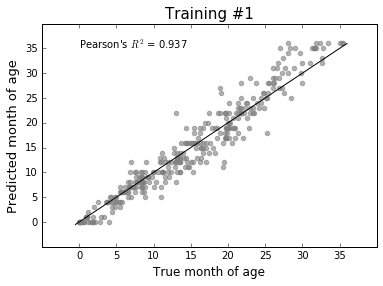

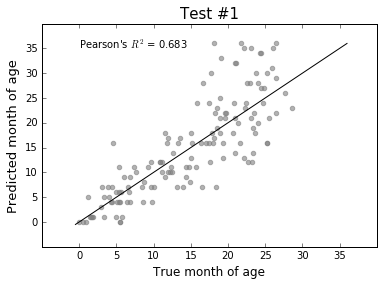

In [868]:
plotScatter(y_train1, y_rf_train1, 'Training #1')
plotScatter(y_test1, y_rf_test1, 'Test #1')

### Training_test 2

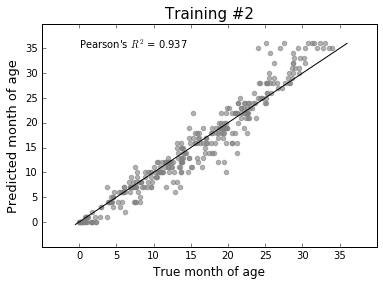

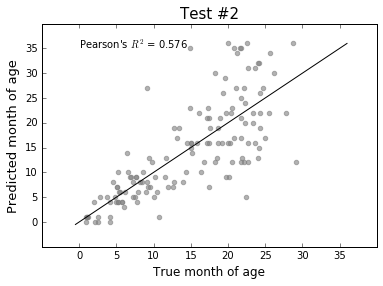

In [869]:
plotScatter(y_train2, y_rf_train2, 'Training #2')
plotScatter(y_test2, y_rf_test2, 'Test #2')

### Training_test 3

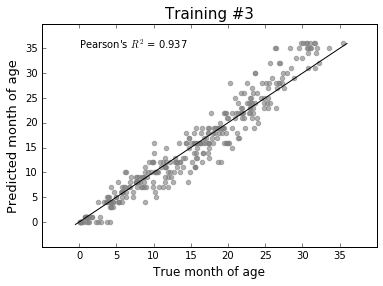

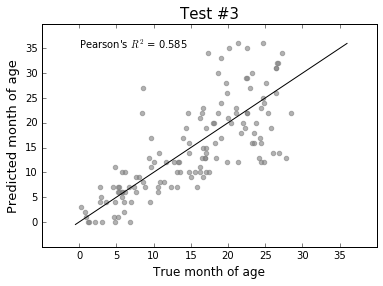

In [870]:
plotScatter(y_train3, y_rf_train3, 'Training #3')
plotScatter(y_test3, y_rf_test3, 'Test #3')

### Training_test 4

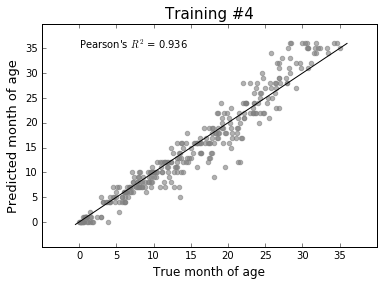

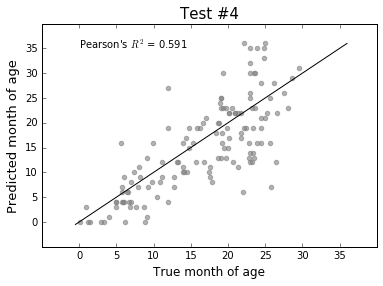

In [871]:
plotScatter(y_train4, y_rf_train4, 'Training #4')
plotScatter(y_test4, y_rf_test4, 'Test #4')

### Training_test 5

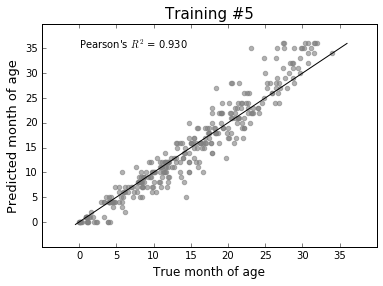

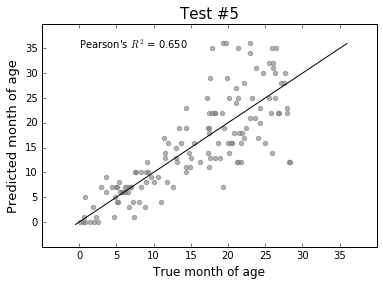

In [872]:
plotScatter(y_train5, y_rf_train5, 'Training #5')
plotScatter(y_test5, y_rf_test5, 'Test #5')

### median result of 3 -> R^2

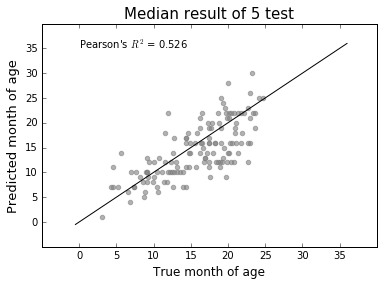

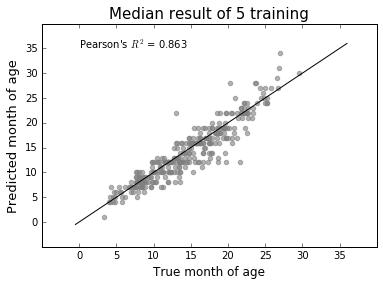

In [875]:
mdn_5_test_predict_y = np.median([y_rf_test1, y_rf_test2, y_rf_test3, y_rf_test4, y_rf_test5], axis=0)
mdn_5_test_true_y = np.median([y_test1, y_test2, y_test3, y_test4, y_test5], axis=0)
plotScatter(mdn_5_test_true_y, mdn_5_test_predict_y, 'Median result of 5 test')

mdn_5_train_predict_y = np.median([y_rf_train1, y_rf_train2, y_rf_train3, y_rf_train4, y_rf_train5], axis=0)
mdn_5_train_true_y = np.median([y_train1, y_train2, y_train3, y_train4, y_train5], axis=0)
plotScatter(mdn_5_train_true_y, mdn_5_train_predict_y, 'Median result of 5 training')

### average result of 3 -> R^2

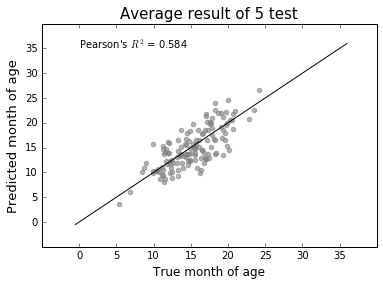

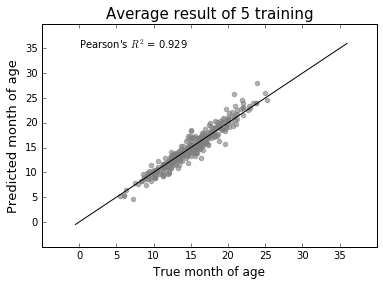

In [876]:
ave_5_test_predict_y = np.mean([y_rf_test1, y_rf_test2, y_rf_test3, y_rf_test4, y_rf_test5], axis=0)
ave_5_test_true_y = np.mean([y_test1, y_test2, y_test3, y_test4, y_test5], axis=0)
plotScatter(ave_5_test_true_y, ave_5_test_predict_y, 'Average result of 5 test')

ave_5_train_predict_y = np.mean([y_rf_train1, y_rf_train2, y_rf_train3, y_rf_train4, y_rf_train5], axis=0)
ave_5_train_true_y = np.mean([y_train1, y_train2, y_train3, y_train4, y_train5], axis=0)
plotScatter(ave_5_train_true_y, ave_5_train_predict_y, 'Average result of 5 training')

In [ ]:
### Average result of 3 R^2 -> median R^2

## 25 features

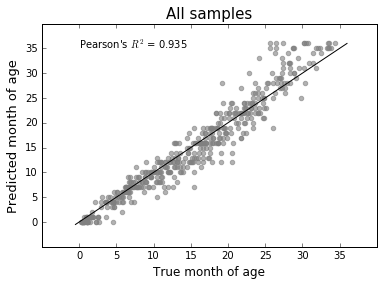

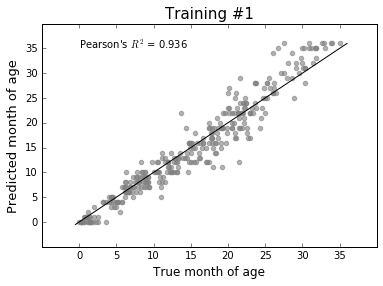

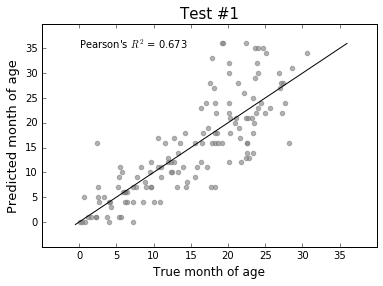

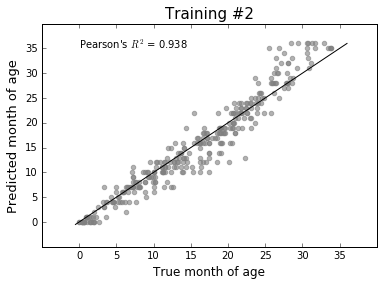

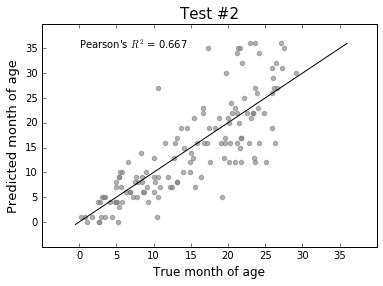

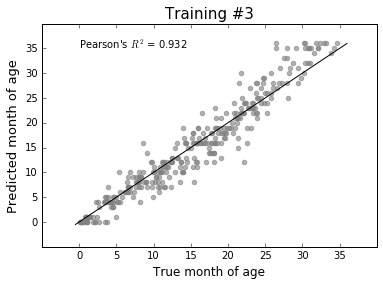

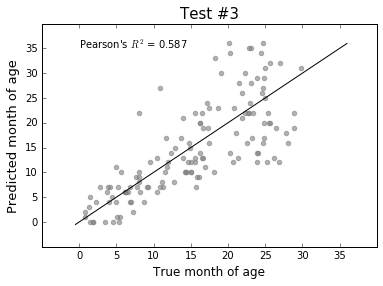

In [884]:
list_25_f_loc = list_idx[:25]

df_all_but_gf_scaled_460__c03_d_m_AND_q75__rf_25 = df_all_but_gf_scaled_460_c03_d_m_AND_q75.ix[:, list_25_f_loc]
list_25_f_names = list(df_all_but_gf_scaled_460_c03_d_m_AND_q75.ix[:, list_25_f_loc].columns)

list_25_f_names

x_25 = df_all_but_gf_scaled_460__c03_d_m_AND_q75__rf_25
y = df_age_460_le36['month']

regr_rf_25 = rfr(max_depth=30, random_state=2)
regr_rf_25.fit(x_25, y)
y_25 = regr_rf_25.predict(x_25)

corr_y__y_25 = np.corrcoef(list(y), list(y_25))[0, 1]

score_25 = regr_rf_25.score(x_25, y)
cross_val_25_mean = cross_val_score(regr_rf_25, x_25, y).mean()

plotScatter(y, y_25, 'All samples')

X_25_train1, X_25_test1, y_25_train1, y_25_test1 = train_test_split(x_25, y,
                                                   train_size=322, # test_size = 138
                                                   random_state=1)

X_25_train2, X_25_test2, y_25_train2, y_25_test2 = train_test_split(x_25, y,
                                                   train_size=322, # test_size = 138
                                                   random_state=2)

X_25_train3, X_25_test3, y_25_train3, y_25_test3 = train_test_split(x_25, y,
                                                   train_size=322, # test_size = 138
                                                   random_state=3)

regr_rf_25_subtest_1 = rfr(max_depth=30, random_state=2)
regr_rf_25_subtest_1.fit(X_25_train1, y_25_train1)

y_rf_25_train1 = regr_rf_25_subtest_1.predict(X_25_train1)
y_rf_25_test1 = regr_rf_25_subtest_1.predict(X_25_test1)

regr_rf_25_subtest_2 = rfr(max_depth=30, random_state=2)
regr_rf_25_subtest_2.fit(X_25_train2, y_25_train2)

y_rf_25_train2 = regr_rf_25_subtest_2.predict(X_25_train2)
y_rf_25_test2 = regr_rf_25_subtest_2.predict(X_25_test2)

regr_rf_25_subtest_3 = rfr(max_depth=30, random_state=2)
regr_rf_25_subtest_3.fit(X_25_train3, y_25_train3)

y_rf_25_train3 = regr_rf_25_subtest_3.predict(X_25_train3)
y_rf_25_test3 = regr_rf_25_subtest_3.predict(X_25_test3)

plotScatter(y_25_train1, y_rf_25_train1, 'Training #1')
plotScatter(y_25_test1, y_rf_25_test1, 'Test #1')

plotScatter(y_25_train2, y_rf_25_train2, 'Training #2')
plotScatter(y_25_test2, y_rf_25_test2, 'Test #2')

plotScatter(y_25_train3, y_rf_25_train3, 'Training #3')
plotScatter(y_25_test3, y_rf_25_test3, 'Test #3')